
#Install Spark + import lib + start spark session

In [ ]:
!apt-get update

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:12 https://cloud.r-project.org/bin/linux/u

In [ ]:
#Get Install the Java Development Kit
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#Get Spark lib -- address need to be change according to the current version of Spark: https://downloads.apache.org/spark/
!wget -q http://apache.osuosl.org/spark/spark-3.0.1/spark-3.0.1-bin-hadoop3.2.tgz
#Unzip th Spark
!tar xf spark-3.0.1-bin-hadoop3.2.tgz
#install findspark for Python
!pip install -q findspark
#Install extra lib(s)
!pip install -q xlrd
!pip install -q kaggle
!pip install -q kora

#import and set environment for spark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.1-bin-hadoop3.2"

import kora
import pandas as pd

import findspark
findspark.init()
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql import *

SPARK_URL = "local[*]"

spark = SparkSession.builder.master(SPARK_URL).getOrCreate()

# Check the pyspark version
import pyspark
print(pyspark.__version__)

     |████████████████████████████████| 51kB 1.2MB/s 
3.0.1


In [ ]:
from pyspark.sql.functions import isnan, when, count, col, countDistinct

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/kaggle"

#Adding API code here
!kaggle datasets download -d uciml/default-of-credit-card-clients-dataset

#Unzip and delete zip file
!unzip /content/default-of-credit-card-clients-dataset.zip && rm /content/default-of-credit-card-clients-dataset.zip

Mounted at /content/gdrive
  0% 0.00/0.98M [00:00<?, ?B/s]
100% 0.98M/0.98M [00:00<00:00, 68.7MB/s]
Archive:  /content/default-of-credit-card-clients-dataset.zip
  inflating: UCI_Credit_Card.csv     


In [ ]:
file_path = '/content/UCI_Credit_Card.csv'

### Data ###
df_Credit_card = spark.read.options(header = "true",inferschema = "true").csv(file_path)
df_Credit_card.show()

+---+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+--------------------------+
| ID|LIMIT_BAL|SEX|EDUCATION|MARRIAGE|AGE|PAY_0|PAY_2|PAY_3|PAY_4|PAY_5|PAY_6|BILL_AMT1|BILL_AMT2|BILL_AMT3|BILL_AMT4|BILL_AMT5|BILL_AMT6|PAY_AMT1|PAY_AMT2|PAY_AMT3|PAY_AMT4|PAY_AMT5|PAY_AMT6|default.payment.next.month|
+---+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+--------------------------+
|  1|  20000.0|  2|        2|       1| 24|    2|    2|   -1|   -1|   -2|   -2|   3913.0|   3102.0|    689.0|      0.0|      0.0|      0.0|     0.0|   689.0|     0.0|     0.0|     0.0|     0.0|                         1|
|  2| 120000.0|  2|        2|       2| 26|   -1|    2|    0|    0|    0|    2|   2682.0|   1725.0|   2682.0|   3272.0|  

#

In [ ]:
df_Credit_card.count()

30000

In [ ]:
df_Credit_card.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- LIMIT_BAL: double (nullable = true)
 |-- SEX: integer (nullable = true)
 |-- EDUCATION: integer (nullable = true)
 |-- MARRIAGE: integer (nullable = true)
 |-- AGE: integer (nullable = true)
 |-- PAY_0: integer (nullable = true)
 |-- PAY_2: integer (nullable = true)
 |-- PAY_3: integer (nullable = true)
 |-- PAY_4: integer (nullable = true)
 |-- PAY_5: integer (nullable = true)
 |-- PAY_6: integer (nullable = true)
 |-- BILL_AMT1: double (nullable = true)
 |-- BILL_AMT2: double (nullable = true)
 |-- BILL_AMT3: double (nullable = true)
 |-- BILL_AMT4: double (nullable = true)
 |-- BILL_AMT5: double (nullable = true)
 |-- BILL_AMT6: double (nullable = true)
 |-- PAY_AMT1: double (nullable = true)
 |-- PAY_AMT2: double (nullable = true)
 |-- PAY_AMT3: double (nullable = true)
 |-- PAY_AMT4: double (nullable = true)
 |-- PAY_AMT5: double (nullable = true)
 |-- PAY_AMT6: double (nullable = true)
 |-- default.payment.next.month: integer (nullable

#Rename column

In [ ]:
df_Credit_card_Rename = df_Credit_card.toDF('ID',"Limit","Sex","Education","Marriage", "Age", "Pay0", "Pay2", "Pay3", "Pay4", "Pay5", "Pay6", "BillATM1", "BillATM2", "BillATM3","BillATM4", "BillATM5", "BillATM6","PayATM1","PayATM2","PayATM3","PayATM4","PayATM5","PayATM6","Defaultpayments")

In [ ]:
df_Credit_card_Rename.show()

+---+--------+---+---------+--------+---+----+----+----+----+----+----+--------+--------+--------+--------+--------+--------+-------+-------+-------+-------+--------+-------+---------------+
| ID|   Limit|Sex|Education|Marriage|Age|Pay0|Pay2|Pay3|Pay4|Pay5|Pay6|BillATM1|BillATM2|BillATM3|BillATM4|BillATM5|BillATM6|PayATM1|PayATM2|PayATM3|PayATM4| PayATM5|PayATM6|Defaultpayments|
+---+--------+---+---------+--------+---+----+----+----+----+----+----+--------+--------+--------+--------+--------+--------+-------+-------+-------+-------+--------+-------+---------------+
|  1| 20000.0|  2|        2|       1| 24|   2|   2|  -1|  -1|  -2|  -2|  3913.0|  3102.0|   689.0|     0.0|     0.0|     0.0|    0.0|  689.0|    0.0|    0.0|     0.0|    0.0|              1|
|  2|120000.0|  2|        2|       2| 26|  -1|   2|   0|   0|   0|   2|  2682.0|  1725.0|  2682.0|  3272.0|  3455.0|  3261.0|    0.0| 1000.0| 1000.0| 1000.0|     0.0| 2000.0|              1|
|  3| 90000.0|  2|        2|       2| 34|   0

In [ ]:
df_Credit_card_Rename.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Limit: double (nullable = true)
 |-- Sex: integer (nullable = true)
 |-- Education: integer (nullable = true)
 |-- Marriage: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Pay0: integer (nullable = true)
 |-- Pay2: integer (nullable = true)
 |-- Pay3: integer (nullable = true)
 |-- Pay4: integer (nullable = true)
 |-- Pay5: integer (nullable = true)
 |-- Pay6: integer (nullable = true)
 |-- BillATM1: double (nullable = true)
 |-- BillATM2: double (nullable = true)
 |-- BillATM3: double (nullable = true)
 |-- BillATM4: double (nullable = true)
 |-- BillATM5: double (nullable = true)
 |-- BillATM6: double (nullable = true)
 |-- PayATM1: double (nullable = true)
 |-- PayATM2: double (nullable = true)
 |-- PayATM3: double (nullable = true)
 |-- PayATM4: double (nullable = true)
 |-- PayATM5: double (nullable = true)
 |-- PayATM6: double (nullable = true)
 |-- Defaultpayments: integer (nullable = true)



#Target balanceness

In [ ]:
df_Credit_card_Rename.groupby("Defaultpayments").count().show()

+---------------+-----+
|Defaultpayments|count|
+---------------+-----+
|              1| 6636|
|              0|23364|
+---------------+-----+



In [ ]:
df_Credit_card_Rename_Balance = df_Credit_card_Rename.sampleBy("Defaultpayments",fractions={1: 0.78,0: 0.22}, seed=10).limit(10000)

In [ ]:
df_Credit_card_Rename_Balance.groupby("Defaultpayments").count().show()

+---------------+-----+
|Defaultpayments|count|
+---------------+-----+
|              1| 5013|
|              0| 4987|
+---------------+-----+



#Numerical Statistic

In [ ]:
numeric_features = [t[0] for t in df_Credit_card_Rename.dtypes if t[1] == 'int']
df_Credit_card_Rename_Balance.select(numeric_features).describe().show()

+-------+-----------------+-------------------+------------------+------------------+-----------------+------------------+------------------+------------------+-----------------+------------------+-----------------+------------------+
|summary|               ID|                Sex|         Education|          Marriage|              Age|              Pay0|              Pay2|              Pay3|             Pay4|              Pay5|             Pay6|   Defaultpayments|
+-------+-----------------+-------------------+------------------+------------------+-----------------+------------------+------------------+------------------+-----------------+------------------+-----------------+------------------+
|  count|            10000|              10000|             10000|             10000|            10000|             10000|             10000|             10000|            10000|             10000|            10000|             10000|
|   mean|        14524.324|             1.5974|            1

#Correlation

In [ ]:
df_input_num = df_Credit_card_Rename_Balance.select(numeric_features)
numeric_data = df_Credit_card_Rename_Balance.select(numeric_features).toPandas()

In [ ]:
#Additional example
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

# convert to vector column first
vector_col = "corr_features"
assembler = VectorAssembler(inputCols=df_Credit_card_Rename_Balance.columns, outputCol=vector_col)
df_vector = assembler.transform(df_Credit_card_Rename_Balance).select(vector_col)

# get correlation matrix
matrix = Correlation.corr(df_vector, vector_col)

matrix.collect()[0]["pearson({})".format(vector_col)].values

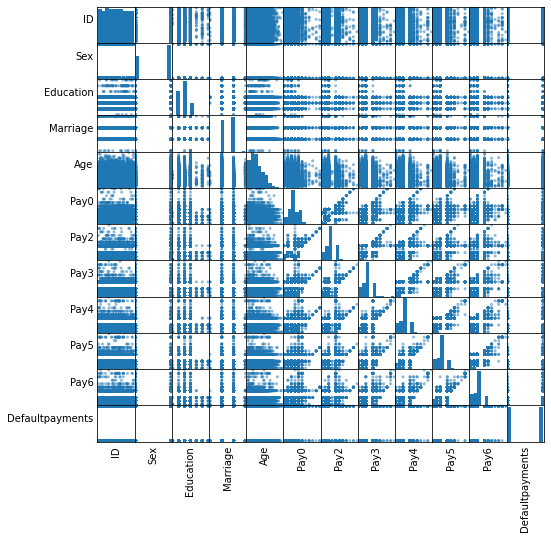

In [ ]:
from pandas.plotting import scatter_matrix

axs = scatter_matrix(numeric_data, figsize=(8, 8));
n = len(numeric_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

#Select high corelate features

In [ ]:
df = df_Credit_card_Rename_Balance.select("Sex","Marriage","Education","Age","Pay0","Pay2","Pay3","Pay4","Pay5","Pay6","Defaultpayments")
##cols = df.columns
df.printSchema()

root
 |-- Sex: integer (nullable = true)
 |-- Marriage: integer (nullable = true)
 |-- Education: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Pay0: integer (nullable = true)
 |-- Pay2: integer (nullable = true)
 |-- Pay3: integer (nullable = true)
 |-- Pay4: integer (nullable = true)
 |-- Pay5: integer (nullable = true)
 |-- Pay6: integer (nullable = true)
 |-- Defaultpayments: integer (nullable = true)



In [ ]:
df.show()

+---+--------+---------+---+----+----+----+----+----+----+---------------+
|Sex|Marriage|Education|Age|Pay0|Pay2|Pay3|Pay4|Pay5|Pay6|Defaultpayments|
+---+--------+---------+---+----+----+----+----+----+----+---------------+
|  2|       1|        2| 24|   2|   2|  -1|  -1|  -2|  -2|              1|
|  1|       1|        2| 57|  -1|   0|  -1|   0|   0|   0|              0|
|  2|       2|        1| 51|  -1|  -1|  -1|  -1|  -1|   2|              0|
|  2|       2|        3| 39|   0|   0|   0|   0|   0|  -1|              0|
|  2|       1|        2| 39|  -1|  -1|  -1|  -1|  -1|  -1|              1|
|  2|       2|        2| 26|   2|   0|   0|   2|   2|   2|              1|
|  2|       1|        1| 40|  -2|  -2|  -2|  -2|  -2|  -2|              1|
|  1|       2|        3| 23|   0|   0|   0|   0|   0|   0|              0|
|  1|       2|        1| 27|   1|  -2|  -1|  -1|  -1|  -1|              1|
|  2|       1|        3| 47|  -1|  -1|  -1|  -1|  -1|  -1|              0|
|  1|       2|        2| 

#Prepare data (for model)

In [ ]:
from pyspark.ml.feature import *
categoricalColumns = ["Sex","Marriage","Education"]
stages = []
for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]
label_stringIdx = StringIndexer(inputCol = "Defaultpayments", outputCol = 'label')
stages += [label_stringIdx]
numericCols = ["Age","Pay0","Pay2","Pay3","Pay4","Pay5","Pay6"]
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

In [ ]:
df.show()

+---+--------+---------+---+----+----+----+----+----+----+---------------+--------+-------------+-------------+----------------+--------------+-----------------+-----+--------------------+
|Sex|Marriage|Education|Age|Pay0|Pay2|Pay3|Pay4|Pay5|Pay6|Defaultpayments|SexIndex|  SexclassVec|MarriageIndex|MarriageclassVec|EducationIndex|EducationclassVec|label|            features|
+---+--------+---------+---+----+----+----+----+----+----+---------------+--------+-------------+-------------+----------------+--------------+-----------------+-----+--------------------+
|  2|       1|        2| 24|   2|   2|  -1|  -1|  -2|  -2|              1|     0.0|(1,[0],[1.0])|          1.0|   (3,[1],[1.0])|           0.0|    (6,[0],[1.0])|  0.0|(17,[0,2,4,10,11,...|
|  1|       1|        2| 57|  -1|   0|  -1|   0|   0|   0|              0|     1.0|    (1,[],[])|          1.0|   (3,[1],[1.0])|           0.0|    (6,[0],[1.0])|  1.0|(17,[2,4,10,11,13...|
|  2|       2|        1| 51|  -1|  -1|  -1|  -1|  -1|  

In [ ]:
df_Ed = df.drop("SexIndex","SexclassVec","MarriageIndex","MarriageclassVec","EducationIndex","EducationclassVec")

In [ ]:
df_Ed.printSchema()

root
 |-- Sex: integer (nullable = true)
 |-- Marriage: integer (nullable = true)
 |-- Education: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Pay0: integer (nullable = true)
 |-- Pay2: integer (nullable = true)
 |-- Pay3: integer (nullable = true)
 |-- Pay4: integer (nullable = true)
 |-- Pay5: integer (nullable = true)
 |-- Pay6: integer (nullable = true)
 |-- Defaultpayments: integer (nullable = true)
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)



In [ ]:
df_Ed.show()

+---+--------+---------+---+----+----+----+----+----+----+---------------+
|Sex|Marriage|Education|Age|Pay0|Pay2|Pay3|Pay4|Pay5|Pay6|Defaultpayments|
+---+--------+---------+---+----+----+----+----+----+----+---------------+
|  2|       1|        2| 24|   2|   2|  -1|  -1|  -2|  -2|              1|
|  1|       1|        2| 57|  -1|   0|  -1|   0|   0|   0|              0|
|  2|       2|        1| 51|  -1|  -1|  -1|  -1|  -1|   2|              0|
|  2|       2|        3| 39|   0|   0|   0|   0|   0|  -1|              0|
|  2|       1|        2| 39|  -1|  -1|  -1|  -1|  -1|  -1|              1|
|  2|       2|        2| 26|   2|   0|   0|   2|   2|   2|              1|
|  2|       1|        1| 40|  -2|  -2|  -2|  -2|  -2|  -2|              1|
|  1|       2|        3| 23|   0|   0|   0|   0|   0|   0|              0|
|  1|       2|        1| 27|   1|  -2|  -1|  -1|  -1|  -1|              1|
|  2|       1|        3| 47|  -1|  -1|  -1|  -1|  -1|  -1|              0|
|  1|       2|        2| 

In [ ]:
train, test = df_Ed.randomSplit([0.7, 0.3], seed = 2018)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 7040
Test Dataset Count: 2960


#Model trainning

In [ ]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
lrModel = lr.fit(train)

#Beta exploration

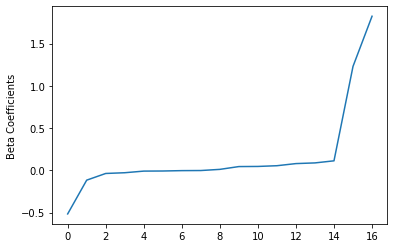

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
beta = np.sort(lrModel.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

#ROC


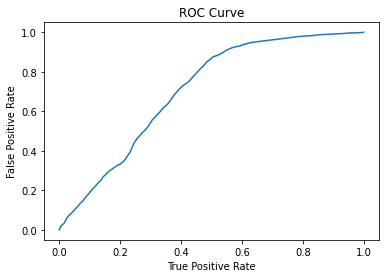

Training set areaUnderROC: 0.7043524363015583


In [ ]:
trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

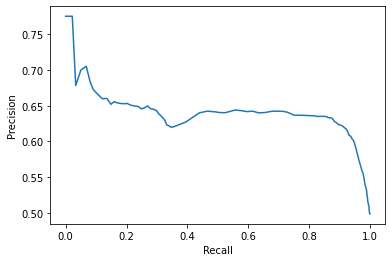

In [ ]:
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [ ]:
predictions = lrModel.transform(test)
predictions.show(10)

+---+--------+---------+---+----+----+----+----+----+----+---------------+-----+--------------------+--------------------+--------------------+----------+
|Sex|Marriage|Education|Age|Pay0|Pay2|Pay3|Pay4|Pay5|Pay6|Defaultpayments|label|            features|       rawPrediction|         probability|prediction|
+---+--------+---------+---+----+----+----+----+----+----+---------------+-----+--------------------+--------------------+--------------------+----------+
|  1|       0|        3| 26|   1|   2|   2|   0|   0|   0|              1|  0.0|(17,[6,10,11,12,1...|[0.84150202874144...|[0.69878146628217...|       0.0|
|  1|       1|        1| 27|  -1|   0|   0|   0|   0|  -2|              1|  0.0|(17,[2,5,10,11,16...|[-0.5423709867822...|[0.36763620288852...|       1.0|
|  1|       1|        1| 28|  -1|  -1|   2|  -1|  -1|  -1|              1|  0.0|(17,[2,5,10,11,12...|[-0.6046125812579...|[0.35328911826250...|       1.0|
|  1|       1|        1| 28|   0|   0|  -2|  -2|  -2|  -2|            

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.7029794571673912
